## Exploring Coronavirus trends
Data obtained from the New York Times dataset: 
https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv

In [60]:
import io
import pandas as pd
import numpy as np
import scipy as sp
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import lxml
import re

In [61]:
%matplotlib inline

In [62]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
cdata = pd.read_csv(url)
print(cdata.head())

         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0


County + State Data 
Enter the state and county names in the first two lines of the following cell.

San Mateo County
2020-03-29: 277 cases, 6 deaths


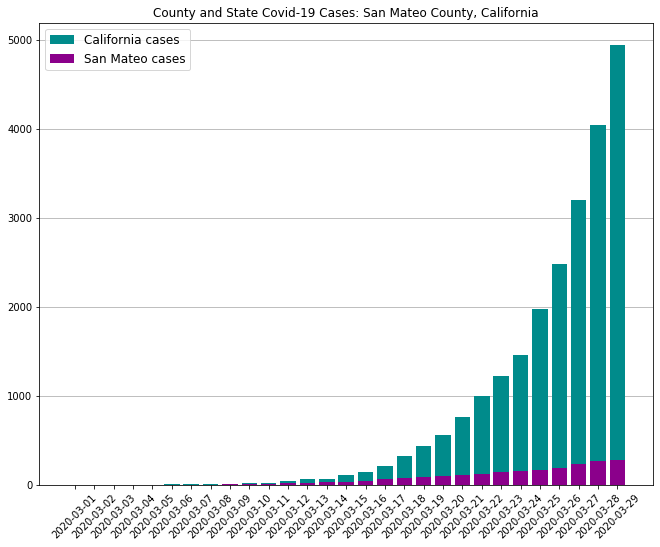

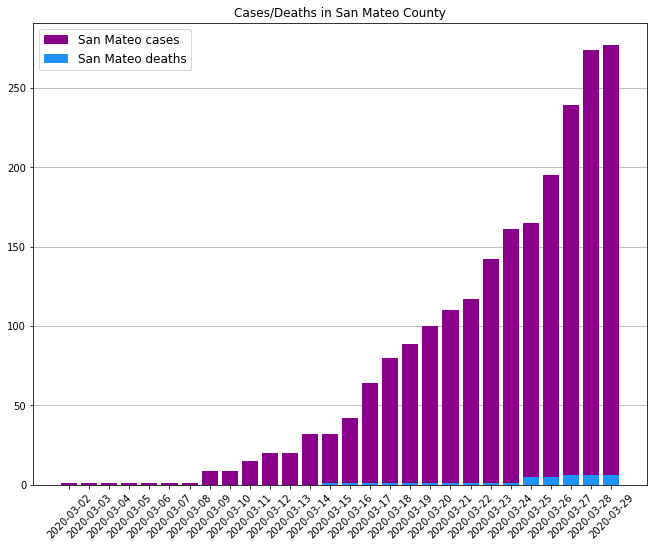

In [63]:
state_name = 'California'
county_name = 'San Mateo'

dfcounties = cdata[cdata['state'] == state_name]
dfstate = dfcounties.groupby(['date'])[['cases', 'deaths']].sum()

dfco = dfcounties[dfcounties['county'] == county_name]
latest = dfco.iloc[-1].tolist()
print(latest[1], "County")
print("{}: {} cases, {} deaths".format(latest[0], latest[4], latest[5]))

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
ax.bar(state.index.tolist(), 
       state['cases'], 
       label="%s cases" % state_name, 
       color='darkcyan')
ax.bar(dfco[dfco['county'] == county_name]['date'], 
       dfco[dfco['county'] == county_name]['cases'], 
       label='%s cases' % county_name, 
       color='darkmagenta')
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.title("County and State Covid-19 Cases: {} County, {}".format(county_name, state_name))
plt.xticks(rotation=45, fontsize='medium')
plt.legend(loc=2, fancybox=True, fontsize='large')
plt.show()

fig1, ax1 = plt.subplots()
fig1.set_size_inches(11, 8.5)
ax1.bar(dfco[dfco['county'] == county_name]['date'], 
       dfco[dfco['county'] == county_name]['cases'], 
       label='%s cases' % county_name, 
       color='darkmagenta')
ax1.bar(dfco[dfco['county'] == county_name]['date'], 
       dfco[dfco['county'] == county_name]['deaths'], 
       label='%s deaths' % county_name, 
       color='dodgerblue')
ax1.grid(axis='y')
ax1.set_axisbelow(True)
plt.title("Cases/Deaths in {} County".format(county_name))
plt.xticks(rotation=45, fontsize='medium')
plt.legend(loc=2, fancybox=True, fontsize='large')
plt.show()
